In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
TRAIN_PATH = "/content/drive/My Drive/ML-Assignment-4/Dataset/Train"
VAL_PATH = "/content/drive/My Drive/ML-Assignment-4/Dataset/Valid"

In [8]:
# Importing general libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import cv2

# Importing deep learning libraries
import keras.backend as K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

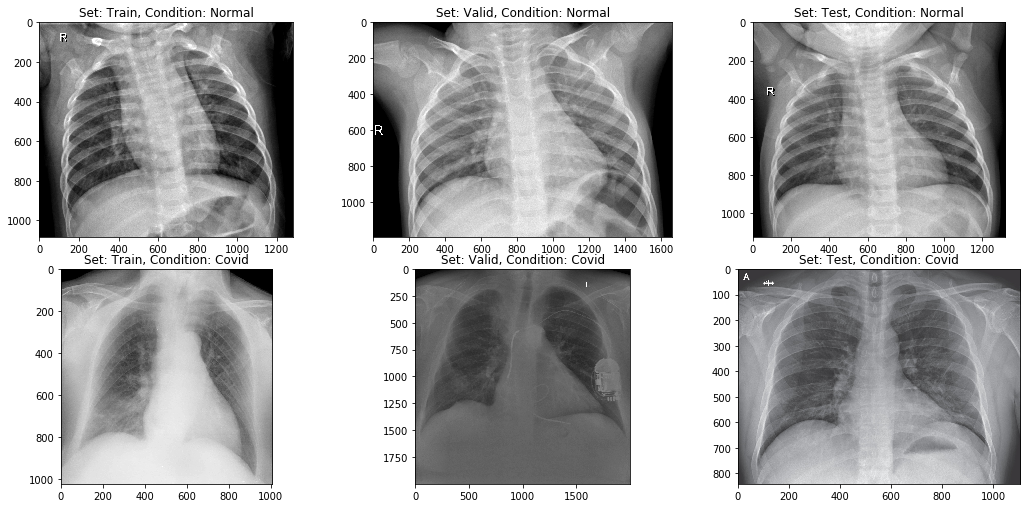

In [4]:
input_path = 'Dataset/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['Train', 'Valid', 'Test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Covid/'+os.listdir(set_path+'/Covid')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Covid'.format(_set))

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/ML-Assignment-4/Dataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 280 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [16]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/ML-Assignment-4/Dataset/Valid',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [17]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 62s 8s/step - loss: 0.7725 - accuracy: 0.5484 - val_loss: 0.6855 - val_accuracy: 0.8333
Epoch 2/10
8/8 [==============================] - 17s 2s/step - loss: 0.5833 - accuracy: 0.7298 - val_loss: 0.4869 - val_accuracy: 0.9167
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4091 - accuracy: 0.8226 - val_loss: 0.2432 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3263 - accuracy: 0.9023 - val_loss: 0.3003 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.2116 - accuracy: 0.9458 - val_loss: 0.2541 - val_accuracy: 0.9167
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.3941 - accuracy: 0.8468 - val_loss: 0.2666 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2677 - accuracy: 0.8984 - val_loss: 0.2149 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

NameError: name 'hist' is not defined

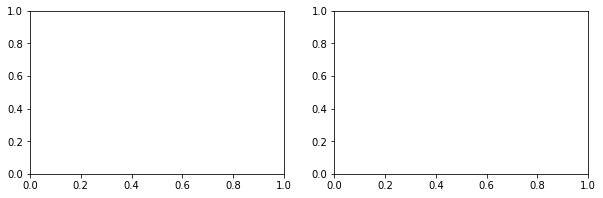

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])